<img src="Data Takeover.png" />

# Machine learning theory and applications
* Introduction
* Theory for random forest algorithms
* Exploratory data analysis
* Splitting data into train and test
* Fitting a model
* Interpretting and evaluating a model

### Introduction

In [1]:
#Machine learning is a branch of artificial intelligence. Machine learning describes a set of methods that are created and applied to data. The methods are built by learning from previous experience.
#Some of the algorithms are in fact very old, but in the last decade there has been an increase in computing power meaning companies now have the software to carry out machine learning for commercial gain.
#When deciding if machine learning is of any use, we first need to decide if: a pattern exists and if we have the relevant data to model the pattern.
#Examples of ml within insurance include consumer advertising, churn prediction, customer acquisition, breakdown reason, detecting fraud...
#Outside of insurance ml is used for facial regognition, natural language processing, detecting cancer and other healthcare, predicting stock prices,  
#Decide an appropriate algorithm, eg for classificaton problems we can use random forests
#fit a model to the data
#evaluate the model, how accurate is it, is it overfit, what are the important features...

### Theory for random forest algorithms

In [2]:
#describe how a random forest works
#start with raw data,needs to be in numeric format
#create a list of 'features' that we think will be useful for predicting the target variable
#choose the first feature in the list. Call this f1. Well f1 can take a value on the number line, call this number a.
#split the data into two sets. Those rows were f1 is greater than a and those less than a.
#from this split the two groups will have a mixture of the target variable; we now calculate the chance of us picking a row at random which has the correct class. This gives us our entropy. Our inforamtion gain is the reduction in entropy.
#we repeat the splitting of the data by f1 =b and see the entorpy that remains. We then calculate the information gain to see how the entropy has reduced.
#repeat the splitting for all values of f1 and find the split that gives us the highest information gain. This gives us our first node and branch.
#now after performing the best split for f1, choose a new feature f2 s.t f2 != f1.
#repeat the splitting process for f2, again maximising the information gain.
#continue selecting features until, all splits have an entropy of 0 or we reach max_splits.
#we have now built one decision tree which can classify our data into classes.
#a random forest builds multiple trees and uses the voting principle, i.e the most common prediction of all trees to determine the final prediction

### Exploratory data analysis

In [3]:
import pandas as pd
import sklearn.datasets
import seaborn as sns

In [26]:
#import the iris dataset, created by Ronald Fisher in 1936 
data= sklearn.datasets.load_iris()
iris = pd.DataFrame(data.data,columns = data.feature_names)
iris['species'] = data.target
#note that for most ml algorithms we require data to be of numeric type/

In [5]:
#we want to classify the three different species of flowers. i.e we want to predict species
#we can use all the data that is available to us in the dataset which is sepal length, sepal width, petal length, petal width
#lets explore the data visually and see if we can identify any trends

In [25]:
sns.__version__

'0.9.0'

In [6]:
#how does the data look
print(iris.shape)
print(iris['species'].value_counts())
iris.head()

(150, 5)
2    50
1    50
0    50
Name: species, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/Users/DEYQ/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/DEYQ/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/DEYQ/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


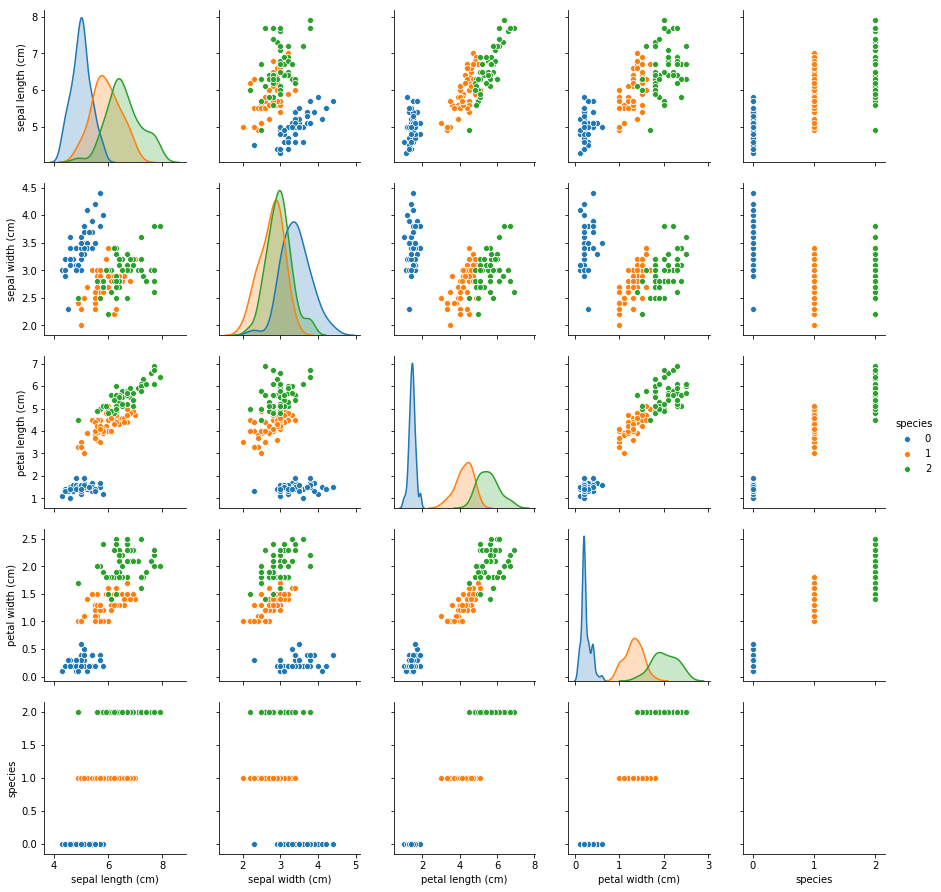

In [29]:
#visualise the data
#we can quickly do this with a pairplot
#these plot the relationships between features and histograms for the univariate distribution. i.e for the cells of the grid where feature=feature plot histogram otherwise plot relationship with feature
#use a hue of species so that we can see the different species clearly
sns.pairplot(data=iris, hue="species")
#from the plots we are able to see that
#from the histograms: sepal length, petal width and petal length have different distibutions. ie species 0 in blue has hihger sepal lengths than species 1 and 2. pick out similair trends for petal
#from pairwise relationships we can see that petal length and petal width are highly correlated. Depending on the type of model that we are fitting this could be a problem

In [9]:
#create a list of features
features = list(iris.columns)
#remove the target variable from the features
features.remove('species')
#at this point we could create interaction features, i.e we could create a feaure petal length (cm) ** petal width (cm).
#we could use hypothesis tests or correlation tests that we met before to understand potential significance of features
#we leave this for now

In [30]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Splitting data into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#for machine learning we need to split our data into what we call training and testing
#the train is then split into two dataframes generally denoted X and y. The case is signnificant and represent the difference bettween an arraay of cols greater than 1 and a vector. 
#y is the single column that we want to be able to predict. X is all the columns that we want to use to predict y.
#we split the test in the same way as the train. The idea being we can build a model which learns the patterns in the train data and is then applied to the X_test data, with the target column being hidden

In [12]:
#lets get the train test splits
X_train, X_test, y_train, y_test = train_test_split(iris[features], iris['species'], test_size=0.33)
#train_test_split is just imported from sklearn and is randomely splitting the data on its row count
#test size indicates the proportion which we want to split our data into.0.33 indicates we want our test data to be a third of our total sample

In [31]:
#lets check the shape of these dataframes match our expectation
for dataframe in [X_train, X_test, y_train, y_test]:
    print(dataframe.shape)
#yep looks good
#we now have our train test splits

(100, 4)
(50, 4)
(100,)
(50,)


### Fitting a model

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
#we can now fit our model. our model will be trying to predict the species of flower. i.e we want to predict a discrete class.
#we mentioned that this is a classification task and since we understand how to use a random forest lets build one of these.

In [32]:
#build a random forest classifier and call it clf
clf = RandomForestClassifier()
#so clf is now a classifier object and we can fit it by using the fit method
clf.fit(X_train, y_train)
#remember we can use clf.(press the tab key) to view the options that are available to use
#the clf has now been fitted, these few lines of code have, under the hood, completed all the logic that we described in the logic behind random forest sections
#note it has also fitted some default paramaters which we leave for now

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
#now that the model has been fitted to the training data, lets apply it to the test data
#we apply the model to the data by using the predict method.
print(clf.predict(X_test))
#view the dataframe
print(X_test.head())
#interpret the results by eye. look at the first two rows of the dataframe

[1 1 1 0 1 0 0 1 2 0 1 2 1 0 0 0 0 0 0 0 0 1 0 1 0 2 0 0 2 1 0 0 2 0 0 2 1
 2 1 0 2 0 2 2 0 2 0 0 1 1]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
65                 6.7               3.1                4.4               1.4
74                 6.4               2.9                4.3               1.3
57                 4.9               2.4                3.3               1.0
35                 5.0               3.2                1.2               0.2
133                6.3               2.8                5.1               1.5


### Intepretting and evaluating a model

In [18]:
#we can evaluate a model to see how many of our predictions we got correct
#we can see what features seem to be the most important for predicting the class of flower
#we can consider other evaluation methods

In [37]:
#we can check what values of y we were expecting
#print(y_test.head())
#we can use the score method of classification objects, this gives us the model accuracy. This is everywhere that the model predictions for y match the actual values of y
print(clf.score(X_test,y_test))
#our score is over 90% this is pretty good
#we can see what featues seem to be the most important for predicting flower type. this is given by the feauture importance
clf.feature_importances_

0.96


array([0.097027  , 0.02899731, 0.37984958, 0.4941261 ])

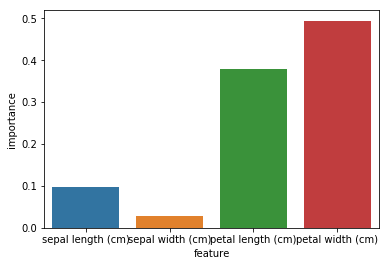

In [38]:
#get the features imoportance into a dataframe
feature_importance_df = pd.DataFrame()
feature_importance_df['feature'] = features
feature_importance_df['importance'] = clf.feature_importances_
#get the feature importance into a plot
sns.barplot(x = 'feature', y = 'importance',data = feature_importance_df)

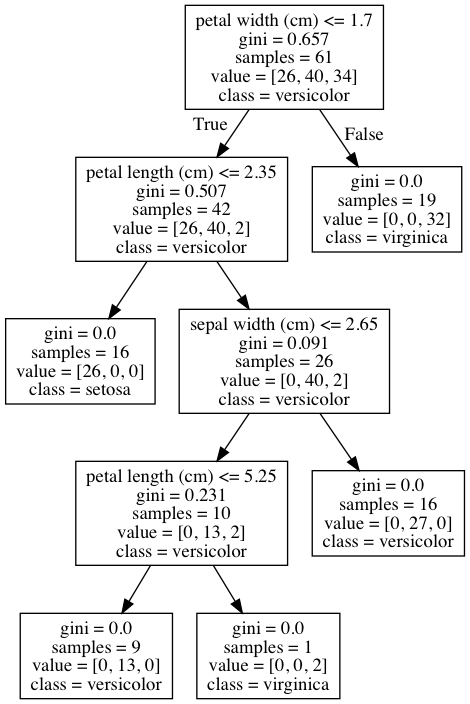

In [22]:
#draw some decision trees
from sklearn import tree
from IPython.display import Image, display
import pydotplus
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,
                                    feature_names=data.feature_names,
                                    class_names=data.target_names)
                                   # filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(data=graph.create_png()))

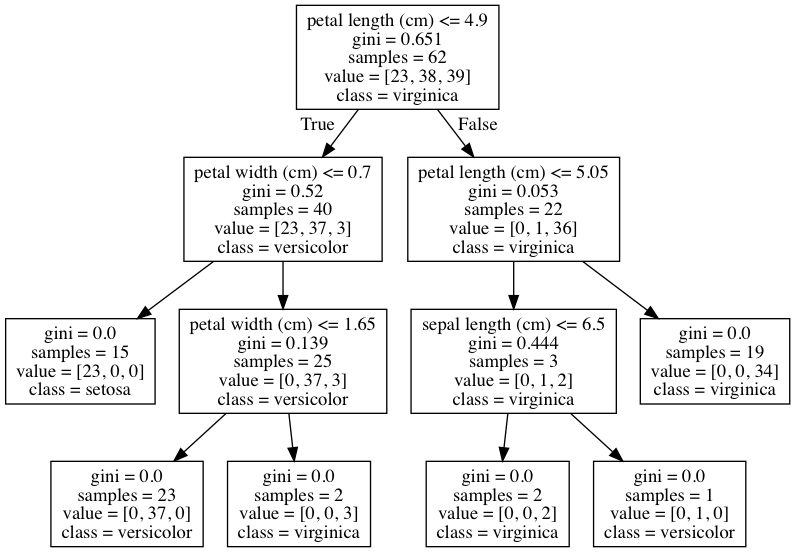

In [23]:
from sklearn import tree
from IPython.display import Image, display
import pydotplus
dot_data = tree.export_graphviz(clf.estimators_[2], out_file=None,
                                    feature_names=data.feature_names,
                                    class_names=data.target_names)
                                   # filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(data=graph.create_png()))

### Excercises

1. <br>
i) think of one use case that your team could have for building a machine learning model<br>
ii) what is the target variable for this model? (what are you trying to predict)<br>
iii) what are the features that you would use for this model? (what columns could you use for the prediction)<br><br>

2. <br>
i) we want to use the data in the analysis csv to be able to build a ml model which will be trying to predict if a customer will leave buisness. read in the csv entitled  and store this in the dataframe df<br>
ii) print a list of the columns in df. create a list of columns that you believe might be useful for the prediction of a churn model. What is the target variable for this churn model?<br>
iii) consider the current data type of each of these features. Are these appropriate for a classification model? If not transform them to be of numeric type so that all features are of numeric type. Note this may require the use of label encoders and  one hot encoders. You can research these independantly <br>
iv) explore how each of these features correlate with churn. this could be achieved through calculating correlation coefficients or through visualisations<br>
v) refine your feature list to only be those that iv) has suggested correlate with rescue<br>
vi) split df into training and test data<br>
vii) fit a model called clf to the training data<br>
viii) apply the model clf to the test data. print the accuracy of the model and determine the feature that appears most significant for predicting churn<br>
